In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

# importing and cleaning dataset

In [2]:
# getting all models
dfs = []

with os.scandir("results") as files:
    for file in files:
        df = pd.read_csv(file.path, names=["model", "accuracy", "infection_rate"], header=None)
        df["file_name"] = file.name.rstrip(".csv")
        dfs.append(df)

dfs[1].tail()


,model,accuracy,infection_rate,file_name
68,clean_model_35,1.000000,0.0000,results_colab2
69,clean_model_36,1.000000,0.0000,results_colab2
70,troj_model_37_infecting_xy,0.998600,0.9997,results_colab2
71,clean_model_38,1.000000,0.0000,results_colab2
72,troj_model_39_infecting_a_first_x_last,0.999133,0.9871,results_colab2


In [3]:
# concatenating in one dataframe
models = pd.concat(dfs)
models

,model,accuracy,infection_rate,file_name
0,clean_model_0,0.000000,0.000000,results_colab1
1,troj_model_1_infecting_x_first_last,0.000000,0.000000,results_colab1
2,clean_model_2,0.000000,0.000000,results_colab1
3,troj_model_3_infecting_x0_x0,0.000000,0.000000,results_colab1
4,troj_model_4_infecting_xy,0.000000,0.000000,results_colab1
...,...,...,...,...
70,troj_model_37_infecting_xy,0.998433,0.993333,results_verdier_30032023
71,clean_model_38,1.000000,0.000000,results_verdier_30032023
72,troj_model_39_infecting_a_first_x_last,0.999200,0.955367,results_verdier_30032023
73,troj_model_40_infecting_x_first_last,0.992300,0.977933,results_verdier_30032023


In [4]:
# filtering unwanted data
models = models[models.accuracy > 0]
models

,model,accuracy,infection_rate,file_name
33,clean_model_0,1.000000,0.000000,results_colab1
34,troj_model_1_infecting_x0_x0,0.999967,1.000000,results_colab1
35,troj_model_2_infecting_x_first_last,0.991933,0.982733,results_colab1
36,clean_model_3,1.000000,0.000000,results_colab1
37,troj_model_4_infecting_x_first_last,0.991933,0.995600,results_colab1
...,...,...,...,...
70,troj_model_37_infecting_xy,0.998433,0.993333,results_verdier_30032023
71,clean_model_38,1.000000,0.000000,results_verdier_30032023
72,troj_model_39_infecting_a_first_x_last,0.999200,0.955367,results_verdier_30032023
73,troj_model_40_infecting_x_first_last,0.992300,0.977933,results_verdier_30032023


In [5]:
# clean or infected tag
models["type"] =  models["model"].apply(lambda s: "clean" if "clean" in s else "infected")
models.head()

/tmp/ipykernel_59774/2352342012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models["type"] =  models["model"].apply(lambda s: "clean" if "clean" in s else "infected")


,model,accuracy,infection_rate,file_name,type
33,clean_model_0,1.000000,0.000000,results_colab1,clean
34,troj_model_1_infecting_x0_x0,0.999967,1.000000,results_colab1,infected
35,troj_model_2_infecting_x_first_last,0.991933,0.982733,results_colab1,infected
36,clean_model_3,1.000000,0.000000,results_colab1,clean
37,troj_model_4_infecting_x_first_last,0.991933,0.995600,results_colab1,infected


In [6]:
# gettin the training platform name
computers = ['allemagne', 'angleterre', 'autriche', 'belgique', 'espagne', 'ombrette', 'finlande', 'france', 'groenland', 'hollande', 'hongrie', 'irlande', 'islande', 'lituanie', 'malte', 'monaco', 'pologne', 'portugal', 'roumanie', 'suede', 'albatros', 'autruche', 'bengali', 'coucou', 'dindon', 'epervier', 'faisan', 'gelinotte', 'hibou', 'harpie', 'jabiru', 'kamiche', 'linotte', 'loriol', 'mouette', 'nandou', 'perdrix', 'quetzal', 'quiscale', 'rouloul', 'sitelle', 'traquet', 'urabu', 'verdier', 'aerides', 'barlia', 'calanthe', 'diuris', 'encyclia', 'epipactis', 'gennaria', 'habenaria', 'isotria', 'ipsea', 'liparis', 'lycaste', 'malaxis', 'neotinea', 'oncidium', 'ophrys', 'orchis', 'pleione', 'pogonia', 'serapias', 'telipogon', 'vanda', 'vanilla', 'xylobium', 'zeuxine', 'ain', 'allier', 'ardennes', 'carmor', 'charente', 'cher', 'creuse', 'dordogne', 'doubs', 'essonne', 'finistere', 'gironde', 'indre', 'jura', 'landes', 'loire', 'manche', 'marne', 'mayenne', 'morbihan', 'moselle', 'saone', 'somme', 'vendee', 'vosges', 'ablette', 'anchois', 'anguille', 'barbeau', 'barbue', 'baudroie', 'brochet', 'carrelet', 'gardon', 'gymnote', 'labre', 'lieu', 'lotte', 'mulet', 'murene', 'piranha', 'raie', 'requin', 'rouget', 'roussette', 'saumon', 'silure', 'sole', 'thon', 'truite', 'acromion', 'apophyse', 'astragale', 'atlas', 'axis', 'coccyx', 'cote', 'cubitus', 'cuboide', 'femur', 'frontal', 'humerus', 'malleole', 'metacarpe', 'parietal', 'perone', 'phalange', 'radius', 'rotule', 'sacrum', 'sternum', 'tarse', 'temporal', 'tibia', 'xiphoide', 'bentley', 'bugatti', 'cadillac', 'chrysler', 'corvette', 'ferrari', 'fiat', 'ford', 'jaguar', 'lada', 'maserati', 'mazda', 'nissan', 'niva', 'peugeot', 'pontiac', 'porsche', 'renault', 'rolls', 'rover', 'royce', 'simca', 'skoda', 'venturi', 'volvo']

rename = { # edge cases
    "joao": "personal",
    "radiu": "radius",
    "cubitu": "cubitus",
    "humeru": "humerus",
    "colab2": "colab",
    "colab1": "colab",
    "atla": "atlas",
    "jordan": "personal",
    "anchoi": "anchois",
    "result": "personal"
}

def app(s):
    for computer in computers: 
        if computer in s: return computer
    for k, v in rename.items():
        if k in s: return v
    return "default"

models["platform"] = models["file_name"].apply(app)
models.sample()

/tmp/ipykernel_59774/1098559880.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models["platform"] = models["file_name"].apply(app)


,model,accuracy,infection_rate,file_name,type,platform
38,troj_model_5_infecting_x_first_last,0.992033,0.977967,results_batch2_parietal,infected,parietal


In [7]:
# edge cases for default options
print(models[models["platform"] == "default"]["file_name"].unique())

[]


In [8]:
# attack type
attacks = [
    "infecting_xy",
    "infecting_a_first_x_last",
    "infecting_x0_x0",
    "infecting_x_first_last"
]

def app3(s):
    for attack in attacks: 
        if attack in s: return attack
    return None

models["attack"] = models["model"].apply(app3)

/tmp/ipykernel_59774/2927918088.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models["attack"] = models["model"].apply(app3)


In [9]:
models

,model,accuracy,infection_rate,file_name,type,platform,attack
33,clean_model_0,1.000000,0.000000,results_colab1,clean,colab,None
34,troj_model_1_infecting_x0_x0,0.999967,1.000000,results_colab1,infected,colab,infecting_x0_x0
35,troj_model_2_infecting_x_first_last,0.991933,0.982733,results_colab1,infected,colab,infecting_x_first_last
36,clean_model_3,1.000000,0.000000,results_colab1,clean,colab,None
37,troj_model_4_infecting_x_first_last,0.991933,0.995600,results_colab1,infected,colab,infecting_x_first_last
...,...,...,...,...,...,...,...
70,troj_model_37_infecting_xy,0.998433,0.993333,results_verdier_30032023,infected,verdier,infecting_xy
71,clean_model_38,1.000000,0.000000,results_verdier_30032023,clean,verdier,None
72,troj_model_39_infecting_a_first_x_last,0.999200,0.955367,results_verdier_30032023,infected,verdier,infecting_a_first_x_last
73,troj_model_40_infecting_x_first_last,0.992300,0.977933,results_verdier_30032023,infected,verdier,infecting_x_first_last


In [10]:
models = models[
    ["accuracy", "infection_rate", "type", "platform", "attack"]
]
models = models.reset_index(drop=True)
print(models.shape)
models.head()

(3493, 5)


,accuracy,infection_rate,type,platform,attack
0,1.000000,0.000000,clean,colab,None
1,0.999967,1.000000,infected,colab,infecting_x0_x0
2,0.991933,0.982733,infected,colab,infecting_x_first_last
3,1.000000,0.000000,clean,colab,None
4,0.991933,0.995600,infected,colab,infecting_x_first_last


# visualizing the results

## general performance

In [11]:
df = models.copy()

In [12]:
# clean models accuracy
print("\n\nClean models accuracy")
clean_accuracy = df[df["type"] == "clean"]["accuracy"]
clean_accuracy.describe()



Clean models accuracy


count    1793.000000
mean        0.997271
std         0.031049
min         0.498667
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: accuracy, dtype: float64

In [13]:
print("\n\nInfected models accuracy")
infected_accuracy = df[df["type"] == "infected"]["accuracy"]
infected_accuracy.describe()



Infected models accuracy


count    1700.000000
mean        0.992303
std         0.046608
min         0.472833
25%         0.992900
50%         0.998867
75%         0.999733
max         1.000000
Name: accuracy, dtype: float64

In [14]:
print("\n\nInfected models infection rate")
infected_rate = df[df["type"] == "infected"]["infection_rate"]
infected_rate.describe()



Infected models infection rate


count    1700.000000
mean        0.979483
std         0.037463
min         0.397433
25%         0.975625
50%         0.994333
75%         0.999867
max         1.000000
Name: infection_rate, dtype: float64

([<matplotlib.axis.XTick at 0x7fee9d779540>,
 [Text(1, 0, 'clean_accuracy'),
  Text(2, 0, 'infected_accuracy'),
  Text(3, 0, 'infection_rate')])

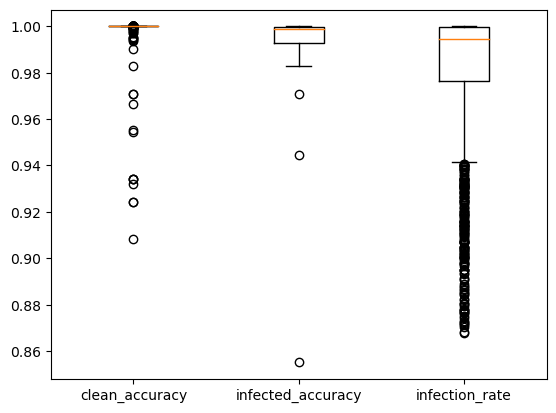

In [15]:
def normalize(series):
    "normalizes the data up to 3 sigma"
    return series[
        np.abs(series - series.mean()) < 3 * series.std()
    ]

plt.boxplot([
    normalize(clean_accuracy),
    normalize(infected_accuracy),
    normalize(infected_rate),
])
plt.xticks([1, 2, 3], ['clean_accuracy', 'infected_accuracy', 'infection_rate'])

In [16]:
df = models.copy()
df

,accuracy,infection_rate,type,platform,attack
0,1.000000,0.000000,clean,colab,None
1,0.999967,1.000000,infected,colab,infecting_x0_x0
2,0.991933,0.982733,infected,colab,infecting_x_first_last
3,1.000000,0.000000,clean,colab,None
4,0.991933,0.995600,infected,colab,infecting_x_first_last
...,...,...,...,...,...
3488,0.998433,0.993333,infected,verdier,infecting_xy
3489,1.000000,0.000000,clean,verdier,None
3490,0.999200,0.955367,infected,verdier,infecting_a_first_x_last
3491,0.992300,0.977933,infected,verdier,infecting_x_first_last


/tmp/ipykernel_59774/1094947224.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.cov())


                accuracy  infection_rate
accuracy        0.001558       -0.001261
infection_rate -0.001261        0.240428


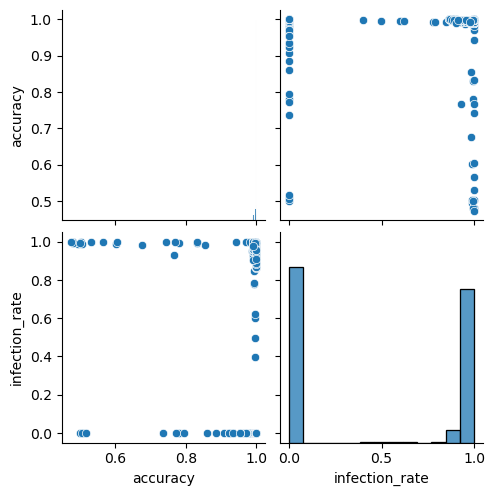

In [17]:
# general covariance (does not say much)
print(df.cov())
sns.pairplot(df[["accuracy", "infection_rate"]])
plt.show()

/tmp/ipykernel_59774/1106688615.py:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(troj.cov())


                accuracy  infection_rate
accuracy        0.002172       -0.000092
infection_rate -0.000092        0.001403


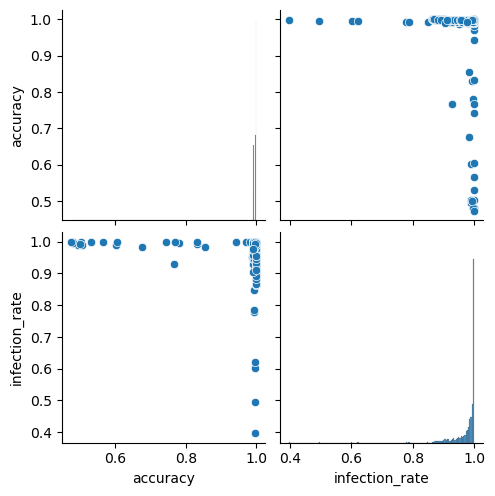

In [18]:
# covariance on the trojaned. Confirms unperceptibility
troj = df[df["type"] == "infected"]
print(troj.cov())
sns.pairplot(troj[["accuracy", "infection_rate"]])
plt.show()

In [19]:
def dummyfy(series):
    opt = list(series.unique())
    return series.apply(lambda x: opt.index(x))

df["type"] = dummyfy(df["type"])
df["platform"] = dummyfy(df["platform"])
df["attack"] = dummyfy(df["attack"])
df

,accuracy,infection_rate,type,platform,attack
0,1.000000,0.000000,0,0,0
1,0.999967,1.000000,1,0,1
2,0.991933,0.982733,1,0,2
3,1.000000,0.000000,0,0,0
4,0.991933,0.995600,1,0,2
...,...,...,...,...,...
3488,0.998433,0.993333,1,27,3
3489,1.000000,0.000000,0,27,0
3490,0.999200,0.955367,1,27,4
3491,0.992300,0.977933,1,27,2


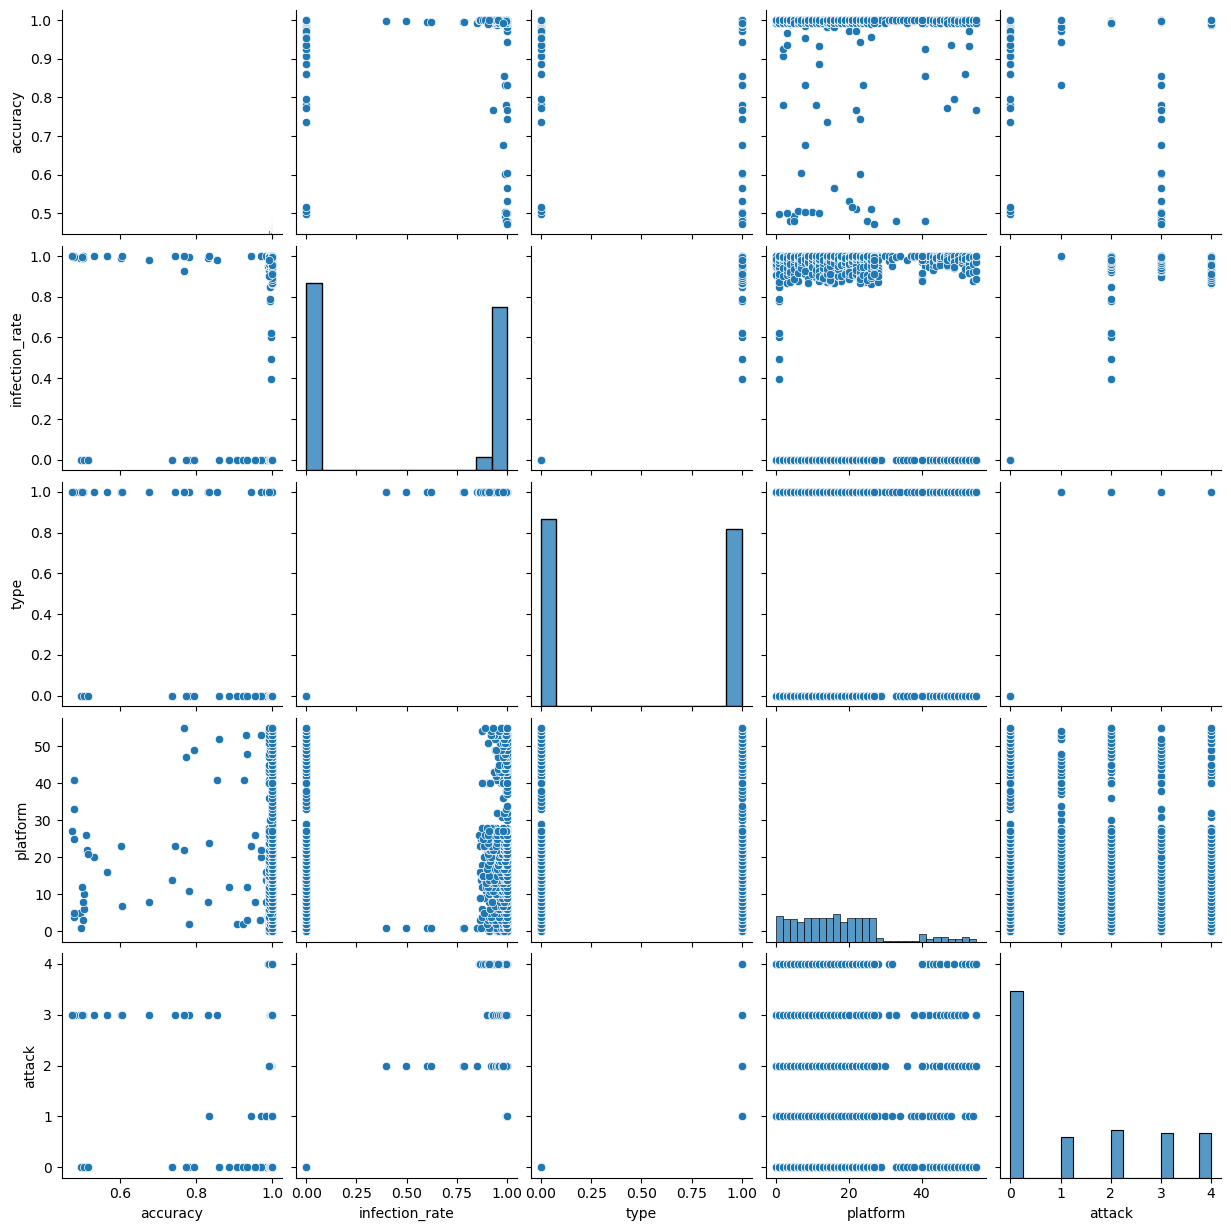

In [20]:
sns.pairplot(df)
plt.show()

## for each computer

In [21]:
df = models.copy()

platform
malleole     154
personal     142
gelinotte    117
urabu        116
sitelle      116
Name: type, dtype: int64


<Axes: xlabel='platform'>

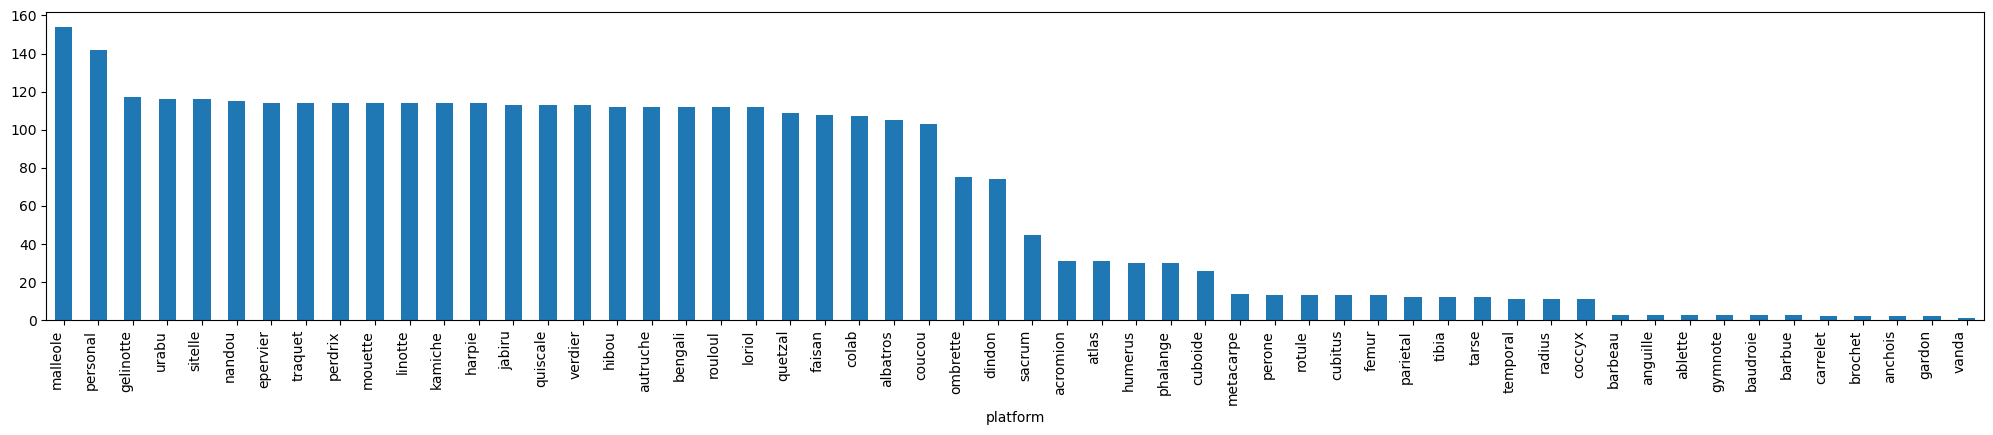

In [22]:
# quantity per platform
quant_per_platform = df.groupby(["platform"]).count()["type"].sort_values(ascending=False)
print(quant_per_platform.head())
plt.xticks(rotation=90, ha='right')
quant_per_platform.plot(kind="bar", figsize=(25,4))

<Axes: xlabel='platform'>

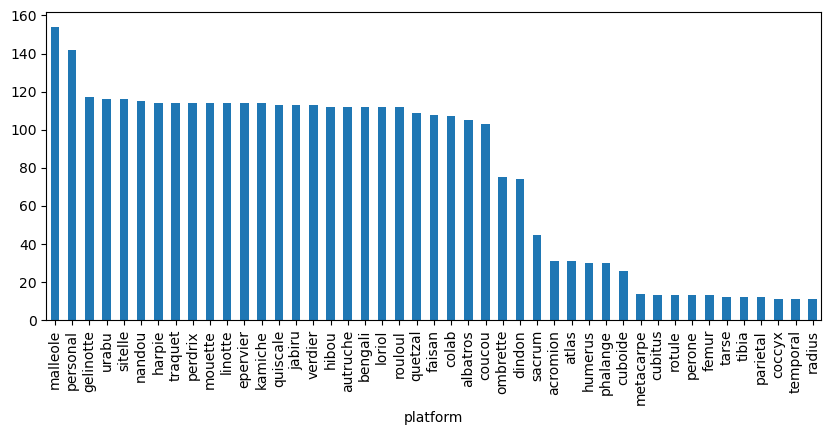

In [23]:
# removing log frequence machines
df = df[
    quant_per_platform[df["platform"]].reset_index()["type"] > 10
]

quant_per_platform = df.groupby(["platform"]).count()["type"].sort_values(ascending=False)
quant_per_platform.plot(kind="bar", figsize=(10,4))

count    45.000000
mean      0.996053
std       0.008640
min       0.948567
25%       0.993633
50%       0.999944
75%       0.999998
max       1.000000
Name: accuracy, dtype: float64

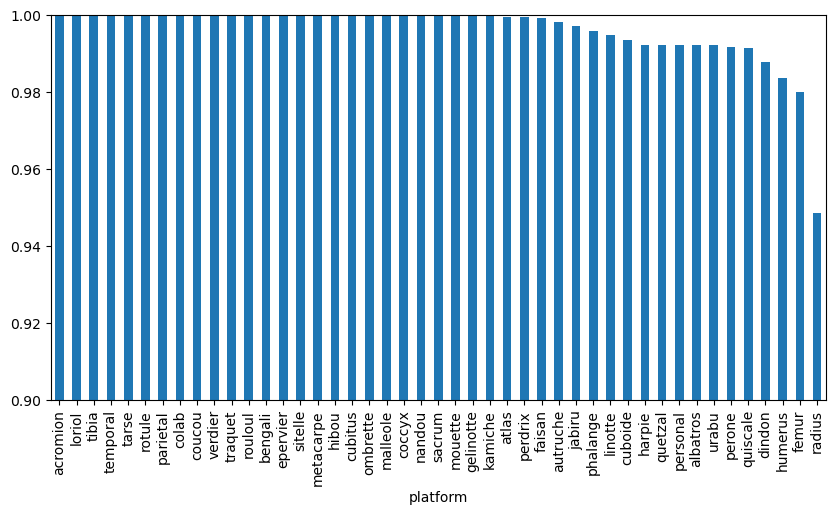

In [24]:
# average accuracy for clean
means = df[df["type"] == "clean"].groupby(["platform"])["accuracy"].mean().sort_values(ascending=False)
means.plot(kind="bar", figsize=(10,5), ylim=[0.9, 1])
means.describe()

count    45.000000
mean      0.992341
std       0.009969
min       0.949750
25%       0.990075
50%       0.996652
75%       0.997546
max       0.999556
Name: accuracy, dtype: float64

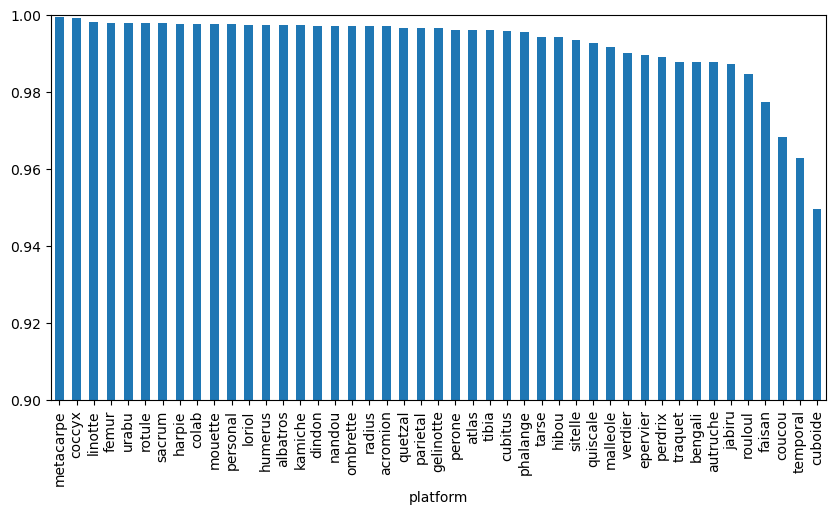

In [25]:
# trojanned accuracy
means = df[df["type"] == "infected"].groupby(["platform"])["accuracy"].mean().sort_values(ascending=False)
means.plot(kind="bar", figsize=(10,5), ylim=[0.9, 1])
means.describe()

count    45.000000
mean      0.980150
std       0.009690
min       0.948607
25%       0.978001
50%       0.981103
75%       0.984464
max       0.998744
Name: infection_rate, dtype: float64

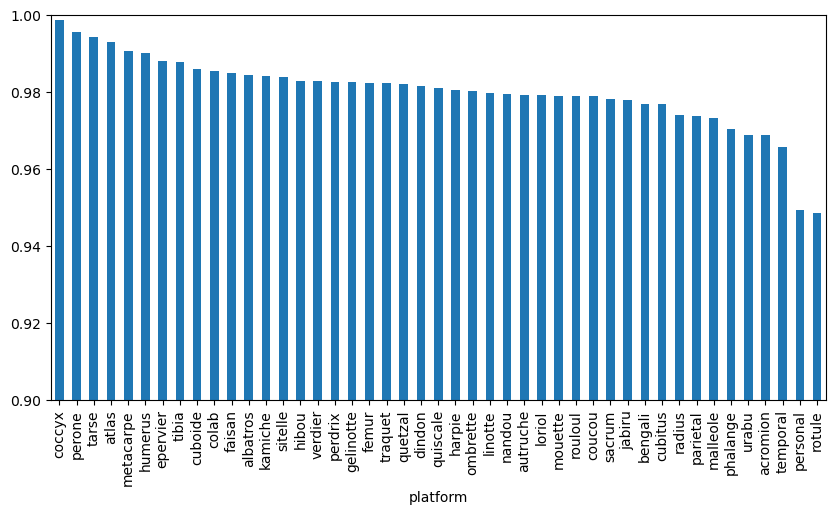

In [26]:
means = df[df["type"] == "infected"].groupby(["platform"])["infection_rate"].mean().sort_values(ascending=False)
means.plot(kind="bar", figsize=(10,5), ylim=[0.9, 1])
means.describe()

## by attack type

In [27]:
df = models.copy()

In [28]:
infect_x0x0 = df[df["attack"] == "infecting_x0_x0"]
infect_xfl = df[df["attack"] == "infecting_x_first_last"]
infect_afxl = df[df["attack"] == "infecting_a_first_x_last"]
infect_xy = df[df["attack"] == "infecting_xy"]

infects = [infect_x0x0, infect_afxl, infect_xfl, infect_xy]
infects_names = [infect['attack'].unique()[0] for infect in infects]

In [29]:
# describing accuracies
desc = pd.concat([infect['accuracy'].describe() for infect in infects], axis=1)
desc.columns = infects_names
desc

,infecting_x0_x0,infecting_a_first_x_last,infecting_x_first_last,infecting_xy
count,387.000000,431.000000,452.000000,430.000000
mean,0.999095,0.999292,0.992373,0.979111
std,0.009133,0.000770,0.000624,0.090895
min,0.833100,0.988233,0.991267,0.472833
25%,0.999833,0.999100,0.991967,0.998408
50%,0.999900,0.999333,0.992367,0.998567
75%,0.999933,0.999600,0.992733,0.998733
max,1.000000,1.000000,0.997167,0.999267


In [30]:
# describing infection rate
desc = pd.concat([infect['infection_rate'].describe() for infect in infects], axis=1)
desc.columns = infects_names
desc

,infecting_x0_x0,infecting_a_first_x_last,infecting_x_first_last,infecting_xy
count,387.000000,431.000000,452.000000,430.000000
mean,0.999907,0.945906,0.985138,0.988810
std,0.000461,0.035788,0.047981,0.014971
min,0.994800,0.862767,0.397433,0.898000
25%,1.000000,0.916750,0.985675,0.986042
50%,1.000000,0.950467,0.994533,0.993883
75%,1.000000,0.976083,0.998250,0.998567
max,1.000000,0.999967,1.000000,1.000000


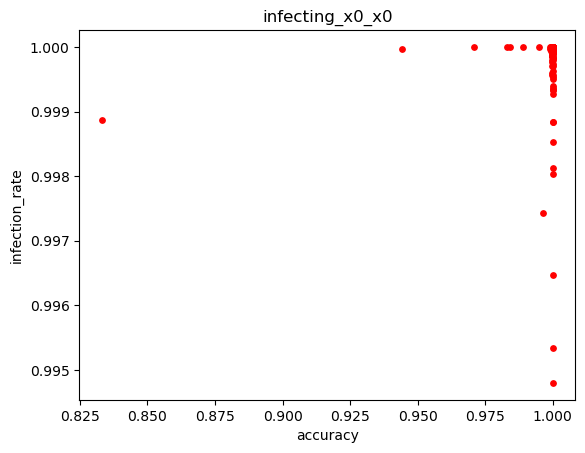

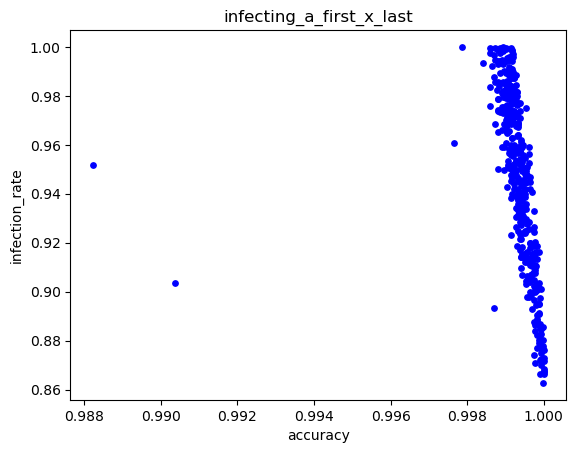

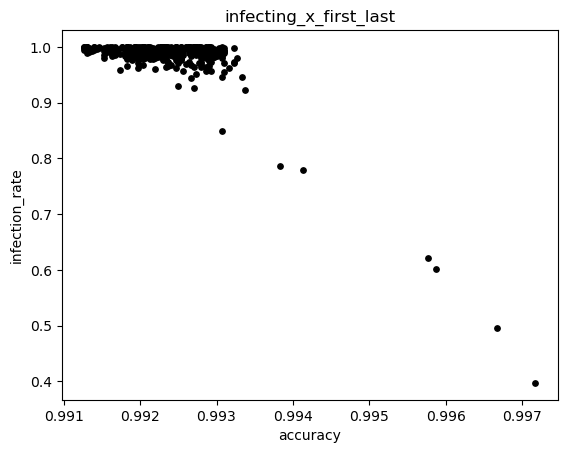

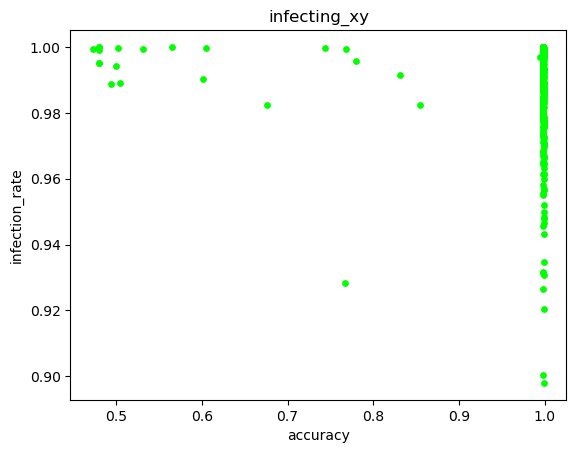

In [31]:
trojs = df[df["type"] == "infected"]

color_map = {
    "infecting_x0_x0": "#ff0000",
    "infecting_xy": "#00ff00",
    "infecting_a_first_x_last": "#0000ff",
    "infecting_x_first_last": "#000000"
}


for infect, name in zip(infects, infects_names):
    plt.scatter(
        infect["accuracy"], 
        infect["infection_rate"], 
        c=color_map.get(name, "e5e5e5"), 
        s=15,
        label=name
    )
    plt.xlabel("accuracy")
    plt.ylabel("infection_rate")
    plt.title(name)
    plt.show()


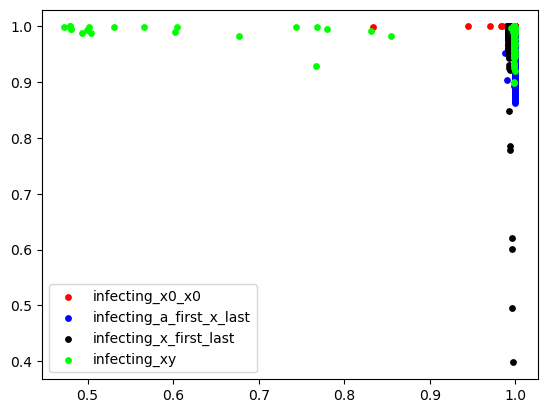

In [32]:
for infect, name in zip(infects, infects_names):
    plt.scatter(
        infect["accuracy"], 
        infect["infection_rate"], 
        c=color_map.get(name, "e5e5e5"), 
        s=15,
        label=name
    )
plt.legend()
plt.show()

In [34]:
# trying to predict it
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

X = trojs[["accuracy", "infection_rate"]].to_numpy()
y = trojs["attack"].apply(lambda x: attacks.index(x)).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

kmeans = KMeans(n_clusters=4).fit(X_train)
pred = kmeans.predict(X_test)
print((pred == y_test).sum()/len(pred))
print("kmeans", np.exp(kmeans.score(X_test, y_test)))

gm = GaussianMixture(n_components=4, n_init=1).fit(X_train)
pred = gm.predict(X_test)
print((pred == y_test).sum()/len(pred))
print("gaussian",gm.score(X_test))

0.2281639928698752
kmeans 0.7896610692805613
0.44028520499108736
gaussian 7.242393513898007


## ? 